In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display

In [2]:
# load the data
df1 = pd.read_csv('item_properties_part1.csv')
df2 = pd.read_csv('item_properties_part2.csv')

properties_df = pd.concat([df1, df2])
events_df = pd.read_csv('events.csv')
category_df = pd.read_csv('category_tree.csv')

# change timestamp to more useful format
properties_df.timestamp = pd.to_datetime(properties_df['timestamp'], unit='ms')
events_df.timestamp = pd.to_datetime(events_df['timestamp'], unit='ms')

In [3]:
# first look at data
display(properties_df.head())
display(events_df.head())
display(category_df.head())

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12.117,257597,view,355908,NaN
1,2015-06-02 05:50:14.164,992329,view,248676,NaN
2,2015-06-02 05:13:19.827,111016,view,318965,NaN
3,2015-06-02 05:12:35.914,483717,view,253185,NaN
4,2015-06-02 05:02:17.106,951259,view,367447,NaN


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


na category values categoryid     0
parentid      25
dtype: int64
number of rows in category df 1669
unique parent 363
unique child 1669
child counts for top 20 parent IDs [31, 22, 22, 19, 18, 17, 15, 15, 13, 13, 13, 12, 12, 11, 11, 10, 10, 10, 10, 10]
view           2664312
addtocart        69332
transaction      22457
dtype: int64


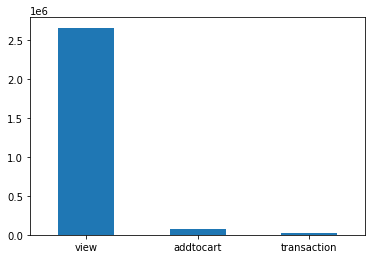

In [4]:
# Data exploration
# check for missing values and look at histograms and counts

# how many na values in category parent and child columns - there are 25 categories with no parent
print('na category values', category_df.isnull().sum(axis = 0))

# number of rows in category df
print('number of rows in category df', len(category_df))

# how many unique parent category ids
print('unique parent', len(category_df['parentid'].unique()))

# how many unique child category ids
print('unique child', len(category_df['categoryid'].unique()))

# how many children ids to the top parent categories have
n = 20
counts = pd.value_counts(category_df['parentid'].values)
print("child counts for top {} parent IDs".format(n), sorted(counts, reverse=True)[:n])

# clearly events are dominated by views and there are no missing values in the events column
counts = pd.value_counts(events_df['event'].values)
print(counts)
counts.plot.bar(rot=0)

In [5]:
events_df[events_df.visitorid == 102019].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid
19690,2015-06-01 16:21:54.335,102019,view,49521,NaN
19501,2015-06-01 16:23:21.314,102019,addtocart,49521,NaN
14842,2015-06-01 16:23:32.596,102019,view,150318,NaN
19573,2015-06-01 16:24:31.497,102019,view,49521,NaN
8701,2015-06-01 16:24:54.837,102019,view,49521,NaN
19708,2015-06-01 16:25:45.872,102019,view,150318,NaN
8740,2015-06-01 16:27:22.269,102019,view,49521,NaN
814,2015-06-01 16:38:56.375,102019,transaction,150318,13556.0
19724,2015-06-01 16:38:56.422,102019,transaction,49521,13556.0


In [11]:
buying_visitors = np.sort(events_df[events_df.event == 'transaction'].visitorid.unique())
buying_visitors.size

11719